# Evaluating RAG Systems with FloTorch

[FloTorch](https://www.flotorch.ai/) offers a robust evaluation framework for Retrieval-Augmented Generation (RAG) systems, enabling comprehensive assessment and comparison of Large Language Models (LLMs). It focuses on key metrics such as accuracy, cost, and latency, crucial for enterprise-level deployments.

## Key Evaluation Metrics for this Notebook

In this notebook, we will focus on evaluating our RAG pipelines using the following metrics:

* **Correctness:** This refers to the total number of samples that semantically both generated and expected are mateched

* **Inference Cost:** This refers to the total cost incurred for invoking Bedrock models to generate responses for all entries in the ground truth dataset.

* **Latency:** This measures the time taken for the inference process, specifically the duration of the Bedrock model invocations.


RAG systems are evaluated using a scoring method that measures response quality to questions in the evaluation set. Responses are rated as correct, Missing or incorrect:

- correct: The response correctly answers the user question and contains no hallucinated content.

- Missing: The answer does not provide the requested information. Such as “I don’t know”, “I’m sorry I can’t find …” or similar sentences without providing a concrete answer to the question.

- Incorrect: The response provides wrong or irrelevant information to answer the user question



### Load env variables

In [1]:
import json
with open("../Lab 1/variables.json", "r") as f:
    variables = json.load(f)

variables

{'accountNumber': '746074413210',
 'regionName': 'us-west-2',
 'collectionArn': 'arn:aws:aoss:us-west-2:746074413210:collection/3f35uv3lze9bdothrm0c',
 'collectionId': '3f35uv3lze9bdothrm0c',
 'vectorIndexName': 'ws-index-',
 'bedrockExecutionRoleArn': 'arn:aws:iam::746074413210:role/advanced-rag-workshop-bedrock_execution_role-us-west-2',
 's3Bucket': '746074413210-us-west-2-advanced-rag-workshop',
 'kbFixedChunk': 'WO4U6AWAU1',
 'kbSemanticChunk': 'OUFEWBGEES',
 'kbHierarchicalChunk': 'IHWIS6EP0H'}

### Evaluation Config

In [2]:
evaluation_config_data = {
   "eval_embedding_model" : "amazon.titan-embed-text-v2:0",
   "eval_retrieval_model" : "cohere.command-r-v1:0",
   "eval_retrieval_service" : "bedrock",
   "aws_region" : variables['regionName'],
   "eval_embed_vector_dimension" : 1024
}

### Load RAG response data 

In [3]:
import json

filename = f"../results/ragas_evaluation_responses_for_different_models.json"

with open(filename, 'r', encoding='utf-8') as f:
    loaded_responses = json.load(f)


### Accuracy Evaluation with Custom Evaluation

In [4]:
from custom_evaluator import CustomEvaluator

In [5]:
evaluator = CustomEvaluator(evaluator_llm_info = evaluation_config_data)
evaluation_metrics = {}
for model_id, inference_data in loaded_responses.items():
    results = evaluator.evaluate(inference_data)
    evaluation_metrics[model_id] = results
    print(f"Evaluation completed for {model_id}")

Processing:   0%|                                                                                                                                                             | 0/20 [00:00<?, ?it/s]

cohere.command-r-v1:0


Processing:   5%|███████▍                                                                                                                                             | 1/20 [00:01<00:22,  1.20s/it]

{'ResponseMetadata': {'RequestId': '72dad6b0-12a2-43c1-b3b8-8c4e227c3b24', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:37 GMT', 'content-type': 'application/json', 'content-length': '268', 'connection': 'keep-alive', 'x-amzn-requestid': '72dad6b0-12a2-43c1-b3b8-8c4e227c3b24'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 969, 'outputTokens': 19, 'totalTokens': 988}, 'metrics': {'latencyMs': 384}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  10%|██████████████▉                                                                                                                                      | 2/20 [00:01<00:17,  1.06it/s]

{'ResponseMetadata': {'RequestId': 'cc84cadf-29fc-495c-9a57-b7eceb8410d5', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:38 GMT', 'content-type': 'application/json', 'content-length': '324', 'connection': 'keep-alive', 'x-amzn-requestid': 'cc84cadf-29fc-495c-9a57-b7eceb8410d5'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth by describing the method to handle large-scale knowledge bases."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 997, 'outputTokens': 29, 'totalTokens': 1026}, 'metrics': {'latencyMs': 497}}
{"score": 1, "explanation": "The prediction matches the ground truth by describing the method to handle large-scale knowledge bases."}
<class 'str'>
cohere.command-r-v1:0


Processing:  15%|██████████████████████▎                                                                                                                              | 3/20 [00:02<00:14,  1.16it/s]

{'ResponseMetadata': {'RequestId': '0258e8ce-a349-4e48-8455-3316f552f3bc', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:38 GMT', 'content-type': 'application/json', 'content-length': '292', 'connection': 'keep-alive', 'x-amzn-requestid': '0258e8ce-a349-4e48-8455-3316f552f3bc'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "BERT\'s role in KBQA framework is explained correctly in the prediction."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 990, 'outputTokens': 25, 'totalTokens': 1015}, 'metrics': {'latencyMs': 435}}
{"score": 1, "explanation": "BERT's role in KBQA framework is explained correctly in the prediction."}
<class 'str'>
cohere.command-r-v1:0


Processing:  20%|█████████████████████████████▊                                                                                                                       | 4/20 [00:03<00:12,  1.30it/s]

{'ResponseMetadata': {'RequestId': '58d550ba-0dc6-4954-b4ef-401247d56ac8', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:39 GMT', 'content-type': 'application/json', 'content-length': '269', 'connection': 'keep-alive', 'x-amzn-requestid': '58d550ba-0dc6-4954-b4ef-401247d56ac8'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 995, 'outputTokens': 19, 'totalTokens': 1014}, 'metrics': {'latencyMs': 369}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  25%|█████████████████████████████████████▎                                                                                                               | 5/20 [00:04<00:10,  1.37it/s]

{'ResponseMetadata': {'RequestId': '5aaedfe4-dd7b-4c5b-8d5c-f0a99108d838', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:40 GMT', 'content-type': 'application/json', 'content-length': '268', 'connection': 'keep-alive', 'x-amzn-requestid': '5aaedfe4-dd7b-4c5b-8d5c-f0a99108d838'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 965, 'outputTokens': 19, 'totalTokens': 984}, 'metrics': {'latencyMs': 363}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  30%|████████████████████████████████████████████▋                                                                                                        | 6/20 [00:04<00:10,  1.38it/s]

{'ResponseMetadata': {'RequestId': 'a5120f7b-3646-462f-a98a-dc2d184fdc2d', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:40 GMT', 'content-type': 'application/json', 'content-length': '262', 'connection': 'keep-alive', 'x-amzn-requestid': 'a5120f7b-3646-462f-a98a-dc2d184fdc2d'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1028, 'outputTokens': 18, 'totalTokens': 1046}, 'metrics': {'latencyMs': 365}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  35%|████████████████████████████████████████████████████▏                                                                                                | 7/20 [00:05<00:09,  1.37it/s]

{'ResponseMetadata': {'RequestId': 'e7ecdcff-0e4e-4604-b3f8-ac1c8ac62721', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:41 GMT', 'content-type': 'application/json', 'content-length': '296', 'connection': 'keep-alive', 'x-amzn-requestid': 'e7ecdcff-0e4e-4604-b3f8-ac1c8ac62721'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise and correct summary of the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1059, 'outputTokens': 24, 'totalTokens': 1083}, 'metrics': {'latencyMs': 427}}
{"score": 1, "explanation": "The prediction provides a concise and correct summary of the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  40%|███████████████████████████████████████████████████████████▌                                                                                         | 8/20 [00:06<00:08,  1.37it/s]

{'ResponseMetadata': {'RequestId': 'c9c50c31-94bf-4491-a580-6ab08180d9e4', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:42 GMT', 'content-type': 'application/json', 'content-length': '314', 'connection': 'keep-alive', 'x-amzn-requestid': 'c9c50c31-94bf-4491-a580-6ab08180d9e4'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction\'s methodology matches the ground truth\'s four-turn conversation construction."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1082, 'outputTokens': 26, 'totalTokens': 1108}, 'metrics': {'latencyMs': 462}}
{"score": 1, "explanation": "The prediction's methodology matches the ground truth's four-turn conversation construction."}
<class 'str'>
cohere.command-r-v1:0


Processing:  45%|███████████████████████████████████████████████████████████████████                                                                                  | 9/20 [00:07<00:08,  1.32it/s]

{'ResponseMetadata': {'RequestId': 'eaeb8567-1f65-4e6c-b84c-f180b68c66c7', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:43 GMT', 'content-type': 'application/json', 'content-length': '344', 'connection': 'keep-alive', 'x-amzn-requestid': 'eaeb8567-1f65-4e6c-b84c-f180b68c66c7'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction does not exactly match the ground truth, and the differences are not solely in the phrasing or terminology."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1000, 'outputTokens': 34, 'totalTokens': 1034}, 'metrics': {'latencyMs': 546}}
{"score": 0, "explanation": "The prediction does not exactly match the ground truth, and the differences are not solely in the phrasing or terminology."}
<class 'str'>
cohere.command-r-v1:0


Processing:  50%|██████████████████████████████████████████████████████████████████████████                                                                          | 10/20 [00:07<00:07,  1.34it/s]

{'ResponseMetadata': {'RequestId': '7a05cdf9-3601-45e3-9734-cd2b9e4efd84', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:43 GMT', 'content-type': 'application/json', 'content-length': '318', 'connection': 'keep-alive', 'x-amzn-requestid': '7a05cdf9-3601-45e3-9734-cd2b9e4efd84'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction does not exactly match the ground truth, and the numbers do not correspond either."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 997, 'outputTokens': 29, 'totalTokens': 1026}, 'metrics': {'latencyMs': 460}}
{"score": 0, "explanation": "The prediction does not exactly match the ground truth, and the numbers do not correspond either."}
<class 'str'>
cohere.command-r-v1:0


Processing:  55%|█████████████████████████████████████████████████████████████████████████████████▍                                                                  | 11/20 [00:08<00:06,  1.40it/s]

{'ResponseMetadata': {'RequestId': '1e85df26-b5db-478e-9eaa-036eca346223', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:44 GMT', 'content-type': 'application/json', 'content-length': '261', 'connection': 'keep-alive', 'x-amzn-requestid': '1e85df26-b5db-478e-9eaa-036eca346223'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 982, 'outputTokens': 18, 'totalTokens': 1000}, 'metrics': {'latencyMs': 370}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  60%|████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 12/20 [00:09<00:05,  1.38it/s]

{'ResponseMetadata': {'RequestId': '90227523-2749-47c6-b6f6-57f4eeb095a8', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:45 GMT', 'content-type': 'application/json', 'content-length': '309', 'connection': 'keep-alive', 'x-amzn-requestid': '90227523-2749-47c6-b6f6-57f4eeb095a8'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{\n    "score": 1,\n    "explanation": "The prediction provides a concise and correct summary of the ground truth."\n}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1066, 'outputTokens': 28, 'totalTokens': 1094}, 'metrics': {'latencyMs': 468}}
{
    "score": 1,
    "explanation": "The prediction provides a concise and correct summary of the ground truth."
}
<class 'str'>
cohere.command-r-v1:0


Processing:  65%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 13/20 [00:09<00:04,  1.41it/s]

{'ResponseMetadata': {'RequestId': 'a220010d-a6f3-4130-bcef-4b521689f9fb', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:46 GMT', 'content-type': 'application/json', 'content-length': '289', 'connection': 'keep-alive', 'x-amzn-requestid': 'a220010d-a6f3-4130-bcef-4b521689f9fb'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction concisely and correctly summarizes the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1071, 'outputTokens': 23, 'totalTokens': 1094}, 'metrics': {'latencyMs': 417}}
{"score": 1, "explanation": "The prediction concisely and correctly summarizes the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 14/20 [00:10<00:04,  1.43it/s]

{'ResponseMetadata': {'RequestId': '225dbffd-6737-4ac6-83f5-b9a48e4b5ef3', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:46 GMT', 'content-type': 'application/json', 'content-length': '260', 'connection': 'keep-alive', 'x-amzn-requestid': '225dbffd-6737-4ac6-83f5-b9a48e4b5ef3'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 961, 'outputTokens': 18, 'totalTokens': 979}, 'metrics': {'latencyMs': 365}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 15/20 [00:11<00:03,  1.43it/s]

{'ResponseMetadata': {'RequestId': '0516bdef-bf25-44b3-862e-c730700d3704', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:47 GMT', 'content-type': 'application/json', 'content-length': '296', 'connection': 'keep-alive', 'x-amzn-requestid': '0516bdef-bf25-44b3-862e-c730700d3704'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise and correct summary of the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1031, 'outputTokens': 24, 'totalTokens': 1055}, 'metrics': {'latencyMs': 429}}
{"score": 1, "explanation": "The prediction provides a concise and correct summary of the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 16/20 [00:11<00:02,  1.48it/s]

{'ResponseMetadata': {'RequestId': '8cc338d7-362f-428a-a1d6-8073300f2a10', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:48 GMT', 'content-type': 'application/json', 'content-length': '262', 'connection': 'keep-alive', 'x-amzn-requestid': '8cc338d7-362f-428a-a1d6-8073300f2a10'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1012, 'outputTokens': 18, 'totalTokens': 1030}, 'metrics': {'latencyMs': 361}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 17/20 [00:12<00:01,  1.51it/s]

{'ResponseMetadata': {'RequestId': '37658ada-c1fa-4d65-8421-d0bcccef51d5', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:48 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '37658ada-c1fa-4d65-8421-d0bcccef51d5'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1002, 'outputTokens': 19, 'totalTokens': 1021}, 'metrics': {'latencyMs': 377}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 18/20 [00:13<00:01,  1.48it/s]

{'ResponseMetadata': {'RequestId': '7b2b440f-182c-425f-a8c3-5c4123c1225f', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:49 GMT', 'content-type': 'application/json', 'content-length': '268', 'connection': 'keep-alive', 'x-amzn-requestid': '7b2b440f-182c-425f-a8c3-5c4123c1225f'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 962, 'outputTokens': 19, 'totalTokens': 981}, 'metrics': {'latencyMs': 365}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 19/20 [00:14<00:00,  1.36it/s]

{'ResponseMetadata': {'RequestId': '1547802d-0bc0-412a-adcb-dbf96a235544', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:50 GMT', 'content-type': 'application/json', 'content-length': '371', 'connection': 'keep-alive', 'x-amzn-requestid': '1547802d-0bc0-412a-adcb-dbf96a235544'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction does not exactly match the ground truth, and it is not a concise summary, nor does it provide the same information in a different way."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1047, 'outputTokens': 41, 'totalTokens': 1088}, 'metrics': {'latencyMs': 624}}
{"score": 0, "explanation": "The prediction does not exactly match the ground truth, and it is not a concise summary, nor does it provide the same information in a different way."}
<class 'str'>
cohere.command-r-v1:0


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


{'ResponseMetadata': {'RequestId': '96eeae62-befa-43b1-b9ac-262d85fbe75c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:50 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '96eeae62-befa-43b1-b9ac-262d85fbe75c'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1047, 'outputTokens': 19, 'totalTokens': 1066}, 'metrics': {'latencyMs': 366}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
Evaluation completed for us.amazon.nova-micro-v1:0


Processing:   0%|                                                                                                                                                             | 0/20 [00:00<?, ?it/s]

cohere.command-r-v1:0


Processing:   5%|███████▍                                                                                                                                             | 1/20 [00:00<00:11,  1.65it/s]

{'ResponseMetadata': {'RequestId': 'b840a8d6-4fef-4822-b20f-b4ab4cdbbd89', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:51 GMT', 'content-type': 'application/json', 'content-length': '260', 'connection': 'keep-alive', 'x-amzn-requestid': 'b840a8d6-4fef-4822-b20f-b4ab4cdbbd89'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 946, 'outputTokens': 18, 'totalTokens': 964}, 'metrics': {'latencyMs': 348}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  10%|██████████████▉                                                                                                                                      | 2/20 [00:01<00:14,  1.23it/s]

{'ResponseMetadata': {'RequestId': 'b0048b82-0101-4608-82a2-445c46413931', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:52 GMT', 'content-type': 'application/json', 'content-length': '349', 'connection': 'keep-alive', 'x-amzn-requestid': 'b0048b82-0101-4608-82a2-445c46413931'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth: both mention the IR-based retrieval approach for handling large-scale knowledge bases."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1036, 'outputTokens': 34, 'totalTokens': 1070}, 'metrics': {'latencyMs': 545}}
{"score": 1, "explanation": "The prediction matches the ground truth: both mention the IR-based retrieval approach for handling large-scale knowledge bases."}
<class 'str'>
cohere.command-r-v1:0


Processing:  15%|██████████████████████▎                                                                                                                              | 3/20 [00:02<00:13,  1.31it/s]

{'ResponseMetadata': {'RequestId': 'b31b0569-59fa-4970-a8a2-fafdb9b95547', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:53 GMT', 'content-type': 'application/json', 'content-length': '296', 'connection': 'keep-alive', 'x-amzn-requestid': 'b31b0569-59fa-4970-a8a2-fafdb9b95547'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "BERT\'s role in the KBQA framework is explained correctly in the prediction."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 984, 'outputTokens': 26, 'totalTokens': 1010}, 'metrics': {'latencyMs': 456}}
{"score": 1, "explanation": "BERT's role in the KBQA framework is explained correctly in the prediction."}
<class 'str'>
cohere.command-r-v1:0


Processing:  20%|█████████████████████████████▊                                                                                                                       | 4/20 [00:02<00:11,  1.41it/s]

{'ResponseMetadata': {'RequestId': '6294c21d-975e-48dc-a849-8771769ba1fe', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:53 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '6294c21d-975e-48dc-a849-8771769ba1fe'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1008, 'outputTokens': 19, 'totalTokens': 1027}, 'metrics': {'latencyMs': 370}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  25%|█████████████████████████████████████▎                                                                                                               | 5/20 [00:03<00:10,  1.48it/s]

{'ResponseMetadata': {'RequestId': '82d32945-43ad-45a0-b481-112748ab557c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:54 GMT', 'content-type': 'application/json', 'content-length': '268', 'connection': 'keep-alive', 'x-amzn-requestid': '82d32945-43ad-45a0-b481-112748ab557c'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 930, 'outputTokens': 19, 'totalTokens': 949}, 'metrics': {'latencyMs': 351}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  30%|████████████████████████████████████████████▋                                                                                                        | 6/20 [00:04<00:09,  1.51it/s]

{'ResponseMetadata': {'RequestId': '3a63e063-8dec-4a12-81aa-dd349f509fd6', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:55 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '3a63e063-8dec-4a12-81aa-dd349f509fd6'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1053, 'outputTokens': 19, 'totalTokens': 1072}, 'metrics': {'latencyMs': 382}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  35%|████████████████████████████████████████████████████▏                                                                                                | 7/20 [00:04<00:08,  1.53it/s]

{'ResponseMetadata': {'RequestId': '18ba4366-59c2-4041-84f4-f97febb6b72f', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:55 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '18ba4366-59c2-4041-84f4-f97febb6b72f'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1008, 'outputTokens': 19, 'totalTokens': 1027}, 'metrics': {'latencyMs': 378}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  40%|███████████████████████████████████████████████████████████▌                                                                                         | 8/20 [00:05<00:08,  1.44it/s]

{'ResponseMetadata': {'RequestId': '09c480ae-922d-4d99-8581-f7f8548204d2', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:56 GMT', 'content-type': 'application/json', 'content-length': '347', 'connection': 'keep-alive', 'x-amzn-requestid': '09c480ae-922d-4d99-8581-f7f8548204d2'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction explains the ground truth\'s construction of the PRACTIQ dataset conversations in four turns and scores a match."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 984, 'outputTokens': 34, 'totalTokens': 1018}, 'metrics': {'latencyMs': 521}}
{"score": 1, "explanation": "The prediction explains the ground truth's construction of the PRACTIQ dataset conversations in four turns and scores a match."}
<class 'str'>
cohere.command-r-v1:0


Processing:  45%|███████████████████████████████████████████████████████████████████                                                                                  | 9/20 [00:06<00:07,  1.47it/s]

{'ResponseMetadata': {'RequestId': '7b075b4f-a3fb-4d43-89dc-6bbce6b3b8c2', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:57 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '7b075b4f-a3fb-4d43-89dc-6bbce6b3b8c2'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1008, 'outputTokens': 19, 'totalTokens': 1027}, 'metrics': {'latencyMs': 348}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  50%|██████████████████████████████████████████████████████████████████████████                                                                          | 10/20 [00:06<00:06,  1.51it/s]

{'ResponseMetadata': {'RequestId': 'cb987fb3-52ae-47e7-bedd-6e693c22ac2b', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:57 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': 'cb987fb3-52ae-47e7-bedd-6e693c22ac2b'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1005, 'outputTokens': 19, 'totalTokens': 1024}, 'metrics': {'latencyMs': 371}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  55%|█████████████████████████████████████████████████████████████████████████████████▍                                                                  | 11/20 [00:07<00:05,  1.53it/s]

{'ResponseMetadata': {'RequestId': '88e0ce81-ad6b-41f0-96cf-bd2be2f6300c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:58 GMT', 'content-type': 'application/json', 'content-length': '268', 'connection': 'keep-alive', 'x-amzn-requestid': '88e0ce81-ad6b-41f0-96cf-bd2be2f6300c'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth exactly."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 977, 'outputTokens': 19, 'totalTokens': 996}, 'metrics': {'latencyMs': 374}}
{"score": 1, "explanation": "The prediction matches the ground truth exactly."}
<class 'str'>
cohere.command-r-v1:0


Processing:  60%|████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 12/20 [00:08<00:05,  1.46it/s]

{'ResponseMetadata': {'RequestId': '8f5b9d13-3c33-4d88-873b-cd71fa24f1c1', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:59 GMT', 'content-type': 'application/json', 'content-length': '365', 'connection': 'keep-alive', 'x-amzn-requestid': '8f5b9d13-3c33-4d88-873b-cd71fa24f1c1'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth\'s description of the approach used, which involves question category classification and SQL prediction."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1008, 'outputTokens': 33, 'totalTokens': 1041}, 'metrics': {'latencyMs': 496}}
{"score": 1, "explanation": "The prediction matches the ground truth's description of the approach used, which involves question category classification and SQL prediction."}
<class 'str'>
cohere.command-r-v1:0


Processing:  65%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 13/20 [00:08<00:04,  1.44it/s]

{'ResponseMetadata': {'RequestId': 'bbf000de-aad1-4df4-a373-f53f931840ca', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:58:59 GMT', 'content-type': 'application/json', 'content-length': '260', 'connection': 'keep-alive', 'x-amzn-requestid': 'bbf000de-aad1-4df4-a373-f53f931840ca'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 968, 'outputTokens': 18, 'totalTokens': 986}, 'metrics': {'latencyMs': 358}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 14/20 [00:09<00:04,  1.48it/s]

{'ResponseMetadata': {'RequestId': 'ad7baa0c-4295-4a8a-bacc-799fe03173db', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:00 GMT', 'content-type': 'application/json', 'content-length': '260', 'connection': 'keep-alive', 'x-amzn-requestid': 'ad7baa0c-4295-4a8a-bacc-799fe03173db'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 972, 'outputTokens': 18, 'totalTokens': 990}, 'metrics': {'latencyMs': 367}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 15/20 [00:10<00:03,  1.40it/s]

{'ResponseMetadata': {'RequestId': 'f3b877ba-1290-427d-9168-40faa601fc20', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:01 GMT', 'content-type': 'application/json', 'content-length': '284', 'connection': 'keep-alive', 'x-amzn-requestid': 'f3b877ba-1290-427d-9168-40faa601fc20'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{\n  "score": 1,\n  "explanation": "The prediction concisely summarizes the ground truth."\n}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1014, 'outputTokens': 25, 'totalTokens': 1039}, 'metrics': {'latencyMs': 441}}
{
  "score": 1,
  "explanation": "The prediction concisely summarizes the ground truth."
}
<class 'str'>
cohere.command-r-v1:0


Processing:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 16/20 [00:10<00:02,  1.46it/s]

{'ResponseMetadata': {'RequestId': '7f6d66b7-e5a6-40cf-8d1a-9dda0051adca', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:01 GMT', 'content-type': 'application/json', 'content-length': '260', 'connection': 'keep-alive', 'x-amzn-requestid': '7f6d66b7-e5a6-40cf-8d1a-9dda0051adca'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 981, 'outputTokens': 18, 'totalTokens': 999}, 'metrics': {'latencyMs': 348}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 17/20 [00:11<00:02,  1.49it/s]

{'ResponseMetadata': {'RequestId': 'a534e4cf-1a63-4102-8c1f-3aadcd53854e', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:02 GMT', 'content-type': 'application/json', 'content-length': '268', 'connection': 'keep-alive', 'x-amzn-requestid': 'a534e4cf-1a63-4102-8c1f-3aadcd53854e'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction closely matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 964, 'outputTokens': 19, 'totalTokens': 983}, 'metrics': {'latencyMs': 371}}
{"score": 1, "explanation": "The prediction closely matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 18/20 [00:12<00:01,  1.47it/s]

{'ResponseMetadata': {'RequestId': '03e4e8b0-c12a-46cd-af60-5058693ffb24', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:03 GMT', 'content-type': 'application/json', 'content-length': '314', 'connection': 'keep-alive', 'x-amzn-requestid': '03e4e8b0-c12a-46cd-af60-5058693ffb24'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction almost exactly matches the ground truth, as it includes one additional element."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 955, 'outputTokens': 27, 'totalTokens': 982}, 'metrics': {'latencyMs': 431}}
{"score": 1, "explanation": "The prediction almost exactly matches the ground truth, as it includes one additional element."}
<class 'str'>
cohere.command-r-v1:0


Processing:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 19/20 [00:12<00:00,  1.50it/s]

{'ResponseMetadata': {'RequestId': 'b0893b64-c8d6-4214-95cb-d4f3eb03e7d5', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:03 GMT', 'content-type': 'application/json', 'content-length': '262', 'connection': 'keep-alive', 'x-amzn-requestid': 'b0893b64-c8d6-4214-95cb-d4f3eb03e7d5'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1004, 'outputTokens': 18, 'totalTokens': 1022}, 'metrics': {'latencyMs': 343}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.47it/s]


{'ResponseMetadata': {'RequestId': '9c1467a6-d342-4f14-a6b5-389ae38e4d9d', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:04 GMT', 'content-type': 'application/json', 'content-length': '260', 'connection': 'keep-alive', 'x-amzn-requestid': '9c1467a6-d342-4f14-a6b5-389ae38e4d9d'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 954, 'outputTokens': 18, 'totalTokens': 972}, 'metrics': {'latencyMs': 350}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
Evaluation completed for us.amazon.nova-pro-v1:0


Processing:   0%|                                                                                                                                                             | 0/20 [00:00<?, ?it/s]

cohere.command-r-v1:0


Processing:   5%|███████▍                                                                                                                                             | 1/20 [00:00<00:11,  1.70it/s]

{'ResponseMetadata': {'RequestId': '41a168d1-312e-4d8b-94e4-647939ecfa1c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:05 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '41a168d1-312e-4d8b-94e4-647939ecfa1c'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1104, 'outputTokens': 19, 'totalTokens': 1123}, 'metrics': {'latencyMs': 331}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  10%|██████████████▉                                                                                                                                      | 2/20 [00:01<00:12,  1.41it/s]

{'ResponseMetadata': {'RequestId': 'ec89f5cc-2cd0-4d7a-8b14-b8f6af5eb3fd', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:05 GMT', 'content-type': 'application/json', 'content-length': '331', 'connection': 'keep-alive', 'x-amzn-requestid': 'ec89f5cc-2cd0-4d7a-8b14-b8f6af5eb3fd'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction\'s steps align with the ground truth\'s IR-based retrieval approach for large-scale KB handling."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1179, 'outputTokens': 33, 'totalTokens': 1212}, 'metrics': {'latencyMs': 538}}
{"score": 1, "explanation": "The prediction's steps align with the ground truth's IR-based retrieval approach for large-scale KB handling."}
<class 'str'>
cohere.command-r-v1:0


Processing:  15%|██████████████████████▎                                                                                                                              | 3/20 [00:02<00:13,  1.25it/s]

{'ResponseMetadata': {'RequestId': 'a219dc6c-f106-41b7-afd3-7aac9cac2068', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:06 GMT', 'content-type': 'application/json', 'content-length': '411', 'connection': 'keep-alive', 'x-amzn-requestid': 'a219dc6c-f106-41b7-afd3-7aac9cac2068'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction does not exactly match the ground truth, and it does not summarize the ground truth either. The prediction also does not indicate any uncertainty or insufficient information."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1174, 'outputTokens': 43, 'totalTokens': 1217}, 'metrics': {'latencyMs': 643}}
{"score": 0, "explanation": "The prediction does not exactly match the ground truth, and it does not summarize the ground truth either. The prediction also does not indicate any uncertainty or insufficient information."}
<class 'str'>
cohere.command-r

Processing:  20%|█████████████████████████████▊                                                                                                                       | 4/20 [00:04<00:24,  1.51s/it]

{'ResponseMetadata': {'RequestId': '72a7112a-a7c3-4c11-b299-0612a3ab2bce', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:09 GMT', 'content-type': 'application/json', 'content-length': '983', 'connection': 'keep-alive', 'x-amzn-requestid': '72a7112a-a7c3-4c11-b299-0612a3ab2bce'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': 'For the given question and prediction, here\'s the evaluation using the provided steps:\n\n1. The Ground Truth is taken as correct.\n2. The Prediction indicates it has sufficient information, so move to the next step.\n3. The Prediction does not exactly match the Ground Truth, so move to step 4.\n4. The Ground Truth is not a number, so move to the next step.\n5. The Prediction is not self-contradictory and answers the question. It also provides a concise and correct summary of the Ground Truth.\n6. The prediction is in the form of a list with several points, which match the themes mentioned in the Gro

Processing:  25%|█████████████████████████████████████▎                                                                                                               | 5/20 [00:05<00:18,  1.21s/it]

{'ResponseMetadata': {'RequestId': 'a05ec971-b70d-4b70-8460-1ccffde0cb4c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:10 GMT', 'content-type': 'application/json', 'content-length': '278', 'connection': 'keep-alive', 'x-amzn-requestid': 'a05ec971-b70d-4b70-8460-1ccffde0cb4c'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction indicates it is not sure about the answer."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 984, 'outputTokens': 22, 'totalTokens': 1006}, 'metrics': {'latencyMs': 408}}
{"score": 0, "explanation": "The prediction indicates it is not sure about the answer."}
<class 'str'>
cohere.command-r-v1:0


Processing:  30%|████████████████████████████████████████████▋                                                                                                        | 6/20 [00:06<00:15,  1.09s/it]

{'ResponseMetadata': {'RequestId': '4defd88e-0526-49bd-8956-b69eafa0b8e9', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:10 GMT', 'content-type': 'application/json', 'content-length': '336', 'connection': 'keep-alive', 'x-amzn-requestid': '4defd88e-0526-49bd-8956-b69eafa0b8e9'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': 'Output: ```json\n{\n  "score": 1,\n  "explanation": "The prediction exactly matches the concise and correct summary of the ground truth."\n}\n```'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1184, 'outputTokens': 36, 'totalTokens': 1220}, 'metrics': {'latencyMs': 591}}
Output: ```json
{
  "score": 1,
  "explanation": "The prediction exactly matches the concise and correct summary of the ground truth."
}
```
<class 'str'>
cohere.command-r-v1:0


Processing:  35%|████████████████████████████████████████████████████▏                                                                                                | 7/20 [00:07<00:12,  1.03it/s]

{'ResponseMetadata': {'RequestId': '65858d44-55c5-4a04-9445-aae6c3b5a12a', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:11 GMT', 'content-type': 'application/json', 'content-length': '296', 'connection': 'keep-alive', 'x-amzn-requestid': '65858d44-55c5-4a04-9445-aae6c3b5a12a'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise and correct summary of the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1180, 'outputTokens': 24, 'totalTokens': 1204}, 'metrics': {'latencyMs': 461}}
{"score": 1, "explanation": "The prediction provides a concise and correct summary of the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  40%|███████████████████████████████████████████████████████████▌                                                                                         | 8/20 [00:07<00:11,  1.09it/s]

{'ResponseMetadata': {'RequestId': 'e56b9769-2937-434e-99d8-affe3b4d4a74', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:12 GMT', 'content-type': 'application/json', 'content-length': '348', 'connection': 'keep-alive', 'x-amzn-requestid': 'e56b9769-2937-434e-99d8-affe3b4d4a74'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise three-stage methodology that matches the ground truth\'s four-turn conversation construction."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1177, 'outputTokens': 32, 'totalTokens': 1209}, 'metrics': {'latencyMs': 540}}
{"score": 1, "explanation": "The prediction provides a concise three-stage methodology that matches the ground truth's four-turn conversation construction."}
<class 'str'>
cohere.command-r-v1:0


Processing:  45%|███████████████████████████████████████████████████████████████████                                                                                  | 9/20 [00:08<00:09,  1.21it/s]

{'ResponseMetadata': {'RequestId': '0ef3692d-c7bb-437c-9b69-0d67eab6dbfd', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:13 GMT', 'content-type': 'application/json', 'content-length': '271', 'connection': 'keep-alive', 'x-amzn-requestid': '0ef3692d-c7bb-437c-9b69-0d67eab6dbfd'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction categories match the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1141, 'outputTokens': 19, 'totalTokens': 1160}, 'metrics': {'latencyMs': 358}}
{"score": 1, "explanation": "The prediction categories match the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  50%|██████████████████████████████████████████████████████████████████████████                                                                          | 10/20 [00:09<00:08,  1.24it/s]

{'ResponseMetadata': {'RequestId': '023f3be3-b2bb-4b4d-b632-8c7f291a657b', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:13 GMT', 'content-type': 'application/json', 'content-length': '330', 'connection': 'keep-alive', 'x-amzn-requestid': '023f3be3-b2bb-4b4d-b632-8c7f291a657b'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth categories of unanswerable questions in the PRACTIQ dataset."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1121, 'outputTokens': 31, 'totalTokens': 1152}, 'metrics': {'latencyMs': 512}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth categories of unanswerable questions in the PRACTIQ dataset."}
<class 'str'>
cohere.command-r-v1:0


Processing:  55%|█████████████████████████████████████████████████████████████████████████████████▍                                                                  | 11/20 [00:10<00:07,  1.20it/s]

{'ResponseMetadata': {'RequestId': '38bc25a7-fc8f-454c-b3dc-8c931eb65157', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:14 GMT', 'content-type': 'application/json', 'content-length': '408', 'connection': 'keep-alive', 'x-amzn-requestid': '38bc25a7-fc8f-454c-b3dc-8c931eb65157'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction closely matches the ground truth, as both discuss the PRACTIQ dataset\'s method of handling ambiguous queries by generating direct SQL responses without user clarification."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1124, 'outputTokens': 42, 'totalTokens': 1166}, 'metrics': {'latencyMs': 634}}
{"score": 1, "explanation": "The prediction closely matches the ground truth, as both discuss the PRACTIQ dataset's method of handling ambiguous queries by generating direct SQL responses without user clarification."}
<class 'str'>
cohere.command-r-v1:0

Processing:  60%|████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 12/20 [00:11<00:07,  1.04it/s]

{'ResponseMetadata': {'RequestId': 'ff800c80-2ab5-49b4-afa6-7a213fd47dd1', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:15 GMT', 'content-type': 'application/json', 'content-length': '501', 'connection': 'keep-alive', 'x-amzn-requestid': 'ff800c80-2ab5-49b4-afa6-7a213fd47dd1'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{\n  "score": 0,\n  "explanation": "The prediction provides detailed information on the approach and evaluation strategy, including the use of multiple models and their respective accuracies. However, it does not concisely summarize the ground truth, which mentions a two-step approach and the use of LLMs."\n}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1223, 'outputTokens': 66, 'totalTokens': 1289}, 'metrics': {'latencyMs': 895}}
{
  "score": 0,
  "explanation": "The prediction provides detailed information on the approach and evaluation strategy, including the use of multiple models and 

Processing:  65%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 13/20 [00:12<00:06,  1.11it/s]

{'ResponseMetadata': {'RequestId': 'd9064fbe-a46b-4fa9-b97a-915d9fe9aaba', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:16 GMT', 'content-type': 'application/json', 'content-length': '284', 'connection': 'keep-alive', 'x-amzn-requestid': 'd9064fbe-a46b-4fa9-b97a-915d9fe9aaba'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise summary of the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1226, 'outputTokens': 22, 'totalTokens': 1248}, 'metrics': {'latencyMs': 410}}
{"score": 1, "explanation": "The prediction provides a concise summary of the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 14/20 [00:13<00:05,  1.04it/s]

{'ResponseMetadata': {'RequestId': 'eb8a576b-8629-4ad7-834c-d5ba6b9ee1da', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:17 GMT', 'content-type': 'application/json', 'content-length': '507', 'connection': 'keep-alive', 'x-amzn-requestid': 'eb8a576b-8629-4ad7-834c-d5ba6b9ee1da'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{\n  "score": 1,\n  "explanation": "The prediction provides further details but matches the ground truth\'s confirmation that the PRACTIQ dataset will be publicly available and provides additional information on the release license and the dataset\'s size, which is permissible according to the scoring guidelines."\n}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1008, 'outputTokens': 60, 'totalTokens': 1068}, 'metrics': {'latencyMs': 840}}
{
  "score": 1,
  "explanation": "The prediction provides further details but matches the ground truth's confirmation that the PRACTIQ dataset will be pu

Processing:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 15/20 [00:14<00:04,  1.14it/s]

{'ResponseMetadata': {'RequestId': '5d1e5329-dc95-419b-873f-672f1ebe5f34', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:18 GMT', 'content-type': 'application/json', 'content-length': '284', 'connection': 'keep-alive', 'x-amzn-requestid': '5d1e5329-dc95-419b-873f-672f1ebe5f34'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise summary of the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1219, 'outputTokens': 22, 'totalTokens': 1241}, 'metrics': {'latencyMs': 418}}
{"score": 1, "explanation": "The prediction provides a concise summary of the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 16/20 [00:14<00:03,  1.23it/s]

{'ResponseMetadata': {'RequestId': 'ea35d5b0-16a8-4e73-8967-61f3eab4431a', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:19 GMT', 'content-type': 'application/json', 'content-length': '289', 'connection': 'keep-alive', 'x-amzn-requestid': 'ea35d5b0-16a8-4e73-8967-61f3eab4431a'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction concisely and correctly summarizes the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1069, 'outputTokens': 23, 'totalTokens': 1092}, 'metrics': {'latencyMs': 417}}
{"score": 1, "explanation": "The prediction concisely and correctly summarizes the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 17/20 [00:15<00:02,  1.31it/s]

{'ResponseMetadata': {'RequestId': 'abbb740a-487c-4e3e-b397-fc5f4fa64cbd', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:19 GMT', 'content-type': 'application/json', 'content-length': '272', 'connection': 'keep-alive', 'x-amzn-requestid': 'abbb740a-487c-4e3e-b397-fc5f4fa64cbd'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction precisely matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1156, 'outputTokens': 19, 'totalTokens': 1175}, 'metrics': {'latencyMs': 385}}
{"score": 1, "explanation": "The prediction precisely matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 18/20 [00:15<00:01,  1.38it/s]

{'ResponseMetadata': {'RequestId': 'b094d4c6-b2c8-4300-ac18-bb4af6544ed9', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:20 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': 'b094d4c6-b2c8-4300-ac18-bb4af6544ed9'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1002, 'outputTokens': 19, 'totalTokens': 1021}, 'metrics': {'latencyMs': 372}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 19/20 [00:16<00:00,  1.38it/s]

{'ResponseMetadata': {'RequestId': 'b89c10b9-d6de-41ec-b9ea-9347b5376058', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:21 GMT', 'content-type': 'application/json', 'content-length': '335', 'connection': 'keep-alive', 'x-amzn-requestid': 'b89c10b9-d6de-41ec-b9ea-9347b5376058'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction closely matches the ground truth, accounting for the additional detail provided in the prediction."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1172, 'outputTokens': 29, 'totalTokens': 1201}, 'metrics': {'latencyMs': 475}}
{"score": 1, "explanation": "The prediction closely matches the ground truth, accounting for the additional detail provided in the prediction."}
<class 'str'>
cohere.command-r-v1:0


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]


{'ResponseMetadata': {'RequestId': '1da58955-abfa-4e1d-a21d-9cf41e2fd8ec', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:21 GMT', 'content-type': 'application/json', 'content-length': '345', 'connection': 'keep-alive', 'x-amzn-requestid': '1da58955-abfa-4e1d-a21d-9cf41e2fd8ec'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction closely matches and expands upon the ground truth, providing additional detail on the steps taken by Amazon."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1155, 'outputTokens': 32, 'totalTokens': 1187}, 'metrics': {'latencyMs': 518}}
{"score": 1, "explanation": "The prediction closely matches and expands upon the ground truth, providing additional detail on the steps taken by Amazon."}
<class 'str'>
Evaluation completed for us.anthropic.claude-3-5-haiku-20241022-v1:0


Processing:   0%|                                                                                                                                                             | 0/20 [00:00<?, ?it/s]

cohere.command-r-v1:0


Processing:   5%|███████▍                                                                                                                                             | 1/20 [00:00<00:11,  1.61it/s]

{'ResponseMetadata': {'RequestId': 'ec593acd-dd5c-40f6-9d06-7ae3f09d1dda', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:22 GMT', 'content-type': 'application/json', 'content-length': '262', 'connection': 'keep-alive', 'x-amzn-requestid': 'ec593acd-dd5c-40f6-9d06-7ae3f09d1dda'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1041, 'outputTokens': 18, 'totalTokens': 1059}, 'metrics': {'latencyMs': 360}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  10%|██████████████▉                                                                                                                                      | 2/20 [00:01<00:13,  1.30it/s]

{'ResponseMetadata': {'RequestId': 'a4a795ea-a972-4a63-90c7-58b32c041176', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:23 GMT', 'content-type': 'application/json', 'content-length': '381', 'connection': 'keep-alive', 'x-amzn-requestid': 'a4a795ea-a972-4a63-90c7-58b32c041176'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction closely matches the ground truth by explaining the method\'s retrieve-and-rerank strategy, which efficiently handles large-scale knowledge bases."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1153, 'outputTokens': 40, 'totalTokens': 1193}, 'metrics': {'latencyMs': 619}}
{"score": 1, "explanation": "The prediction closely matches the ground truth by explaining the method's retrieve-and-rerank strategy, which efficiently handles large-scale knowledge bases."}
<class 'str'>
cohere.command-r-v1:0


Processing:  15%|██████████████████████▎                                                                                                                              | 3/20 [00:02<00:13,  1.28it/s]

{'ResponseMetadata': {'RequestId': 'ee53321d-8c73-4d1e-8757-6c703b02ccc2', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:24 GMT', 'content-type': 'application/json', 'content-length': '335', 'connection': 'keep-alive', 'x-amzn-requestid': 'ee53321d-8c73-4d1e-8757-6c703b02ccc2'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise summary of the ground truth, outlining the roles of BERT in the KBQA framework."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1118, 'outputTokens': 34, 'totalTokens': 1152}, 'metrics': {'latencyMs': 529}}
{"score": 1, "explanation": "The prediction provides a concise summary of the ground truth, outlining the roles of BERT in the KBQA framework."}
<class 'str'>
cohere.command-r-v1:0


Processing:  20%|█████████████████████████████▊                                                                                                                       | 4/20 [00:02<00:11,  1.34it/s]

{'ResponseMetadata': {'RequestId': '35ebcb57-c7a7-47ae-af94-f195b6939bbb', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:24 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '35ebcb57-c7a7-47ae-af94-f195b6939bbb'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1112, 'outputTokens': 19, 'totalTokens': 1131}, 'metrics': {'latencyMs': 361}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  25%|█████████████████████████████████████▎                                                                                                               | 5/20 [00:03<00:10,  1.39it/s]

{'ResponseMetadata': {'RequestId': 'bcbf4e48-709f-404d-a867-428175f87290', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:25 GMT', 'content-type': 'application/json', 'content-length': '302', 'connection': 'keep-alive', 'x-amzn-requestid': 'bcbf4e48-709f-404d-a867-428175f87290'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides concise and correct numbers supporting the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1089, 'outputTokens': 23, 'totalTokens': 1112}, 'metrics': {'latencyMs': 412}}
{"score": 1, "explanation": "The prediction provides concise and correct numbers supporting the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  30%|████████████████████████████████████████████▋                                                                                                        | 6/20 [00:04<00:09,  1.46it/s]

{'ResponseMetadata': {'RequestId': 'ac169e61-4daa-44fa-8051-ae49351b2297', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:26 GMT', 'content-type': 'application/json', 'content-length': '273', 'connection': 'keep-alive', 'x-amzn-requestid': 'ac169e61-4daa-44fa-8051-ae49351b2297'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction closely summarizes the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1115, 'outputTokens': 19, 'totalTokens': 1134}, 'metrics': {'latencyMs': 361}}
{"score": 1, "explanation": "The prediction closely summarizes the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  35%|████████████████████████████████████████████████████▏                                                                                                | 7/20 [00:14<00:50,  3.90s/it]

{'ResponseMetadata': {'RequestId': '25a9cb40-cda6-4b38-b5bb-9ad368d5d991', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:36 GMT', 'content-type': 'application/json', 'content-length': '4733', 'connection': 'keep-alive', 'x-amzn-requestid': '25a9cb40-cda6-4b38-b5bb-9ad368d5d991'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': 'Following the instructions you provided, here are the scores for each of the predictions and the corresponding explanations in a JSON format:\n```json\n[\n    {\n        "question": "What are the three main sub-tasks in Knowledge Base Question Answering (KBQA) as identified in the paper?",\n        "ground_truth": "The three main sub-tasks in KBQA are topic entity detection, entity linking, and relation detection.",\n        "prediction": "Sorry, I don\'t have sufficient information to provide an answer.",\n        "score": 0,\n        "explanation": "Prediction is not sure about the answer."\n    },

Processing:  40%|███████████████████████████████████████████████████████████▌                                                                                         | 8/20 [00:15<00:34,  2.88s/it]

{'ResponseMetadata': {'RequestId': 'e0495f16-97b7-4388-83c2-bbd295160cdb', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:37 GMT', 'content-type': 'application/json', 'content-length': '284', 'connection': 'keep-alive', 'x-amzn-requestid': 'e0495f16-97b7-4388-83c2-bbd295160cdb'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise summary of the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1131, 'outputTokens': 22, 'totalTokens': 1153}, 'metrics': {'latencyMs': 422}}
{"score": 1, "explanation": "The prediction provides a concise summary of the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  45%|███████████████████████████████████████████████████████████████████                                                                                  | 9/20 [00:16<00:23,  2.18s/it]

{'ResponseMetadata': {'RequestId': '4d74879a-1e9f-4585-a7ca-886c08c1e5bb', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:38 GMT', 'content-type': 'application/json', 'content-length': '280', 'connection': 'keep-alive', 'x-amzn-requestid': '4d74879a-1e9f-4585-a7ca-886c08c1e5bb'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction categories match those in the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1103, 'outputTokens': 21, 'totalTokens': 1124}, 'metrics': {'latencyMs': 394}}
{"score": 1, "explanation": "The prediction categories match those in the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  50%|██████████████████████████████████████████████████████████████████████████                                                                          | 10/20 [00:16<00:17,  1.74s/it]

{'ResponseMetadata': {'RequestId': '4bb76d1f-1e9f-4280-8d8d-84f983f6fa9b', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:38 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '4bb76d1f-1e9f-4280-8d8d-84f983f6fa9b'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1061, 'outputTokens': 19, 'totalTokens': 1080}, 'metrics': {'latencyMs': 383}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  55%|█████████████████████████████████████████████████████████████████████████████████▍                                                                  | 11/20 [00:17<00:13,  1.45s/it]

{'ResponseMetadata': {'RequestId': 'c7b2323c-1f70-42ef-820d-b1312206b87c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:39 GMT', 'content-type': 'application/json', 'content-length': '322', 'connection': 'keep-alive', 'x-amzn-requestid': 'c7b2323c-1f70-42ef-820d-b1312206b87c'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction closely matches the ground truth by explaining how PRACTIQ handles ambiguous queries."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1039, 'outputTokens': 28, 'totalTokens': 1067}, 'metrics': {'latencyMs': 464}}
{"score": 1, "explanation": "The prediction closely matches the ground truth by explaining how PRACTIQ handles ambiguous queries."}
<class 'str'>
cohere.command-r-v1:0


Processing:  60%|████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 12/20 [00:18<00:10,  1.28s/it]

{'ResponseMetadata': {'RequestId': '11318c66-e44d-49af-845c-000fa82b55af', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:40 GMT', 'content-type': 'application/json', 'content-length': '418', 'connection': 'keep-alive', 'x-amzn-requestid': '11318c66-e44d-49af-845c-000fa82b55af'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction provides a list of models and their evaluation results which does not answer the approach used. The ground truth mentions category classification and SQL prediction as the approach."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1082, 'outputTokens': 43, 'totalTokens': 1125}, 'metrics': {'latencyMs': 630}}
{"score": 0, "explanation": "The prediction provides a list of models and their evaluation results which does not answer the approach used. The ground truth mentions category classification and SQL prediction as the approach."}
<class 'str'>
co

Processing:  65%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 13/20 [00:19<00:07,  1.10s/it]

{'ResponseMetadata': {'RequestId': '2200cd11-3220-4d46-b291-51e8800958ca', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:41 GMT', 'content-type': 'application/json', 'content-length': '306', 'connection': 'keep-alive', 'x-amzn-requestid': '2200cd11-3220-4d46-b291-51e8800958ca'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction provides detailed findings and insights rather than a concise answer."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1251, 'outputTokens': 24, 'totalTokens': 1275}, 'metrics': {'latencyMs': 436}}
{"score": 0, "explanation": "The prediction provides detailed findings and insights rather than a concise answer."}
<class 'str'>
cohere.command-r-v1:0


Processing:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 14/20 [00:20<00:06,  1.01s/it]

{'ResponseMetadata': {'RequestId': '1b448730-b415-4b03-ab7f-9780d7eb44da', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:42 GMT', 'content-type': 'application/json', 'content-length': '359', 'connection': 'keep-alive', 'x-amzn-requestid': '1b448730-b415-4b03-ab7f-9780d7eb44da'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction indicates the dataset might be available but doesn\'t exactly match the ground truth which states it is publicly available."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1016, 'outputTokens': 34, 'totalTokens': 1050}, 'metrics': {'latencyMs': 540}}
{"score": 0, "explanation": "The prediction indicates the dataset might be available but doesn't exactly match the ground truth which states it is publicly available."}
<class 'str'>
cohere.command-r-v1:0


Processing:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 15/20 [00:20<00:04,  1.10it/s]

{'ResponseMetadata': {'RequestId': 'b98c96ae-d199-416f-8ab4-0acabbc83d7d', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:42 GMT', 'content-type': 'application/json', 'content-length': '296', 'connection': 'keep-alive', 'x-amzn-requestid': 'b98c96ae-d199-416f-8ab4-0acabbc83d7d'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction provides a concise and correct summary of the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1154, 'outputTokens': 24, 'totalTokens': 1178}, 'metrics': {'latencyMs': 421}}
{"score": 1, "explanation": "The prediction provides a concise and correct summary of the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 16/20 [00:21<00:03,  1.16it/s]

{'ResponseMetadata': {'RequestId': '18b03f7b-403f-4456-9015-7b825561a519', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:43 GMT', 'content-type': 'application/json', 'content-length': '293', 'connection': 'keep-alive', 'x-amzn-requestid': '18b03f7b-403f-4456-9015-7b825561a519'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': 'Output: ```json\n{\n  "score": 1,\n  "explanation": "The prediction matches the ground truth."\n}\n```'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1064, 'outputTokens': 29, 'totalTokens': 1093}, 'metrics': {'latencyMs': 491}}
Output: ```json
{
  "score": 1,
  "explanation": "The prediction matches the ground truth."
}
```
<class 'str'>
cohere.command-r-v1:0


Processing:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 17/20 [00:22<00:02,  1.26it/s]

{'ResponseMetadata': {'RequestId': 'd5cf3964-0bf1-40fc-8737-25ce11afa58c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:44 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': 'd5cf3964-0bf1-40fc-8737-25ce11afa58c'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1094, 'outputTokens': 19, 'totalTokens': 1113}, 'metrics': {'latencyMs': 379}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 18/20 [00:22<00:01,  1.31it/s]

{'ResponseMetadata': {'RequestId': 'b3861ba9-02c3-4505-ae1c-3a92123348e7', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:44 GMT', 'content-type': 'application/json', 'content-length': '303', 'connection': 'keep-alive', 'x-amzn-requestid': 'b3861ba9-02c3-4505-ae1c-3a92123348e7'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 0, "explanation": "The prediction indicates a different number of risk domains than the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 976, 'outputTokens': 25, 'totalTokens': 1001}, 'metrics': {'latencyMs': 438}}
{"score": 0, "explanation": "The prediction indicates a different number of risk domains than the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 19/20 [00:23<00:00,  1.39it/s]

{'ResponseMetadata': {'RequestId': '9c477eb8-a163-4b7e-9c6c-56a75bd297d1', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:45 GMT', 'content-type': 'application/json', 'content-length': '262', 'connection': 'keep-alive', 'x-amzn-requestid': '9c477eb8-a163-4b7e-9c6c-56a75bd297d1'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1068, 'outputTokens': 18, 'totalTokens': 1086}, 'metrics': {'latencyMs': 360}}
{"score": 1, "explanation": "The prediction matches the ground truth."}
<class 'str'>
cohere.command-r-v1:0


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:24<00:00,  1.20s/it]

{'ResponseMetadata': {'RequestId': '4e3e71ad-ef73-40fa-a697-df571502dc1f', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 21 Apr 2025 11:59:46 GMT', 'content-type': 'application/json', 'content-length': '270', 'connection': 'keep-alive', 'x-amzn-requestid': '4e3e71ad-ef73-40fa-a697-df571502dc1f'}, 'RetryAttempts': 0}, 'output': {'message': {'role': 'assistant', 'content': [{'text': '{"score": 1, "explanation": "The prediction exactly matches the ground truth."}'}]}}, 'stopReason': 'end_turn', 'usage': {'inputTokens': 1136, 'outputTokens': 19, 'totalTokens': 1155}, 'metrics': {'latencyMs': 383}}
{"score": 1, "explanation": "The prediction exactly matches the ground truth."}
<class 'str'>
Evaluation completed for us.anthropic.claude-3-5-sonnet-20241022-v2:0


### Evaluation output

In [7]:
final_evaluation = evaluator.evaluate_results(evaluation_metrics)

### Cost and Latency Evaluation

In [8]:
from cost_compute_utils import calculate_cost_and_latency_metrics

for model in loaded_responses:
    inference_data = loaded_responses[model]
    cost_and_latency_metrics = calculate_cost_and_latency_metrics(inference_data, model,
                evaluation_config_data["aws_region"])
    custom_eval_metrics = final_evaluation[model].copy()
    if model not in final_evaluation:
        # Insert - key doesn't exist yet
        final_evaluation[model] = {**custom_eval_metrics, **cost_and_latency_metrics}
    else:
        # Update - key already exists
        merged = {**custom_eval_metrics, **cost_and_latency_metrics}
        final_evaluation[model].update(merged)

### Evaluation metrics as pandas df

In [9]:
import pandas as pd

# Convert the nested dictionary to a DataFrame
evaluation_df = pd.DataFrame.from_dict(final_evaluation, orient='index')

# If you want the kb_type as a column instead of an index
evaluation_df = evaluation_df.reset_index().rename(columns={'index': 'model'})

evaluation_df

,model,number of samples correct,inference_cost,average_inference_cost,latency,average_latency,processed_items
0,us.amazon.nova-micro-v1:0,17,0.003813,0.000191,19610.0,980.5,20
1,us.amazon.nova-pro-v1:0,20,0.085545,0.004277,23764.0,1188.2,20
2,us.anthropic.claude-3-5-haiku-20241022-v1:0,17,0.026591,0.001330,132016.0,6600.8,20
3,us.anthropic.claude-3-5-sonnet-20241022-v2:0,16,0.381432,0.019072,127302.0,6365.1,20


#### Apply plots for a given metrics

In [10]:
from plot_util import plot_column
import ipywidgets as widgets
from IPython.display import display

/Users/fl_lpt-301/Documents/flotorchnotebooks/lab4/sample-advanced-rag-using-bedrock-and-sagemaker/ravi/sample-advanced-rag-using-bedrock-and-sagemaker/Lab 4/plot_util.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


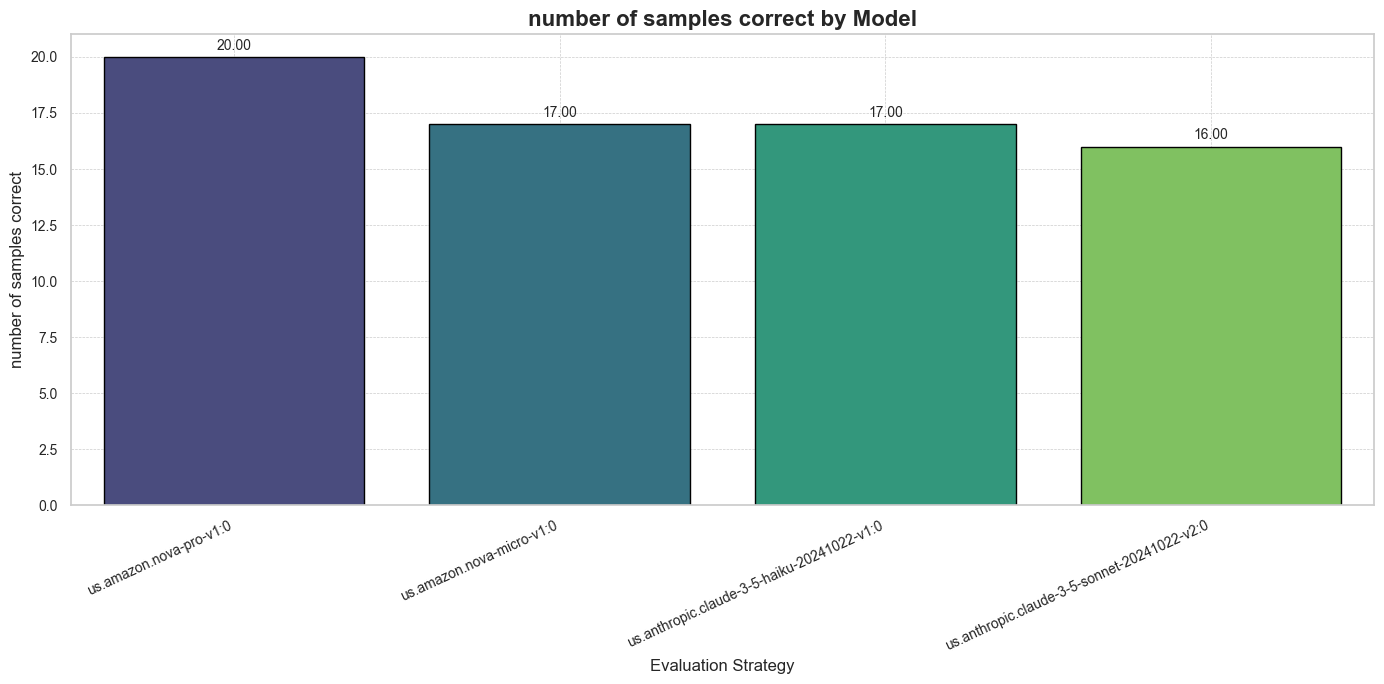

Dropdown(description='Metric:', layout=Layout(width='50%'), options=('number of samples correct', 'inference_c…

ToggleButtons(description='Plot Type:', options=('bar', 'line'), style=ToggleButtonsStyle(description_width='i…

Output()

In [12]:
# Dropdown widget
dropdown = widgets.Dropdown(
    options=[col for col in evaluation_df.columns if col != 'model'],
    description='Metric:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Optional: Dropdown for plot kind (bar or line)
plot_kind = widgets.ToggleButtons(
    options=['bar', 'line'],
    description='Plot Type:',
    style={'description_width': 'initial'}
)

# Function to call on change
def update_plot(column, kind):
    plot_column(evaluation_df, column, kind=kind)

# Link widgets to function
interactive_plot = widgets.interactive_output(update_plot, {
    'column': dropdown,
    'kind': plot_kind
})

# Display UI
display(dropdown, plot_kind, interactive_plot)